In [18]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [19]:
sal=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
sal

rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male  139750
1        Prof          B             20           16  Male  173200
2    AsstProf          B              4            3  Male   79750
3        Prof          B             45           39  Male  115000
4        Prof          B             40           41  Male  141500
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035

[397 rows x 6 columns]

In [20]:
# top five rows of salary data
sal.head()


rank discipline  yrs.since.phd  yrs.service   sex  salary
0      Prof          B             19           18  Male  139750
1      Prof          B             20           16  Male  173200
2  AsstProf          B              4            3  Male   79750
3      Prof          B             45           39  Male  115000
4      Prof          B             40           41  Male  141500

In [21]:
#bottom five rows of salary data
sal.tail()


rank discipline  yrs.since.phd  yrs.service   sex  salary
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035

In [22]:
# Column names of the dataset
sal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [23]:
#Checking for null values
sal.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

- There are no null values present in the dataset

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

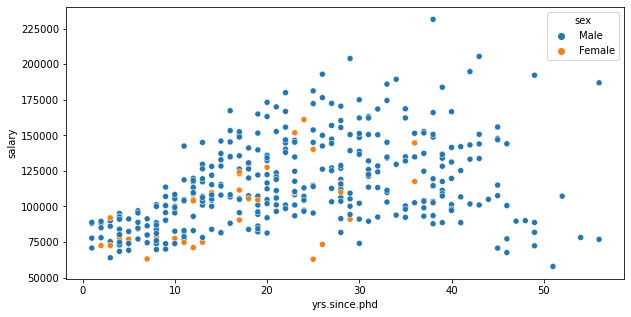

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='yrs.since.phd', y = 'salary', data=sal, hue = 'sex' )

- With PhD and experiance salary increases both in male and female and females have less salary when compared with males.

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

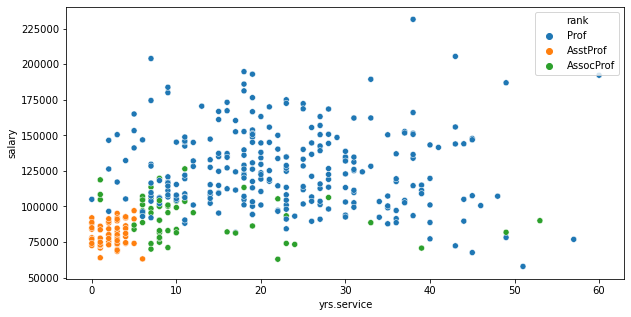

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='yrs.service', y = 'salary', data=sal, hue = 'rank')

- Assistant Professor have less salary followed by Associate Professor and Professor. 

<Figure size 720x360 with 0 Axes>

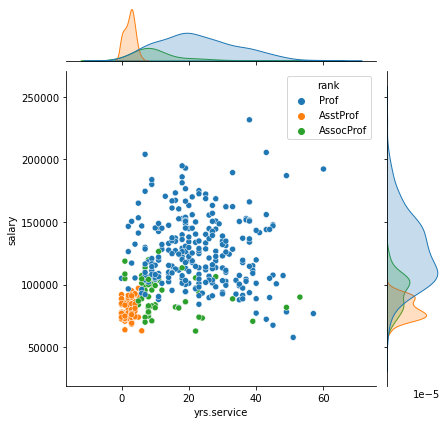

In [26]:
plt.figure(figsize=(10,5))
sns.jointplot(x='yrs.service', y = 'salary', data=sal, hue = 'rank')

 
    - Assistant Professor salary spread is less
    - Associate Professor salary spread little more than Asst Prof.
    - Professor salary is widely spread

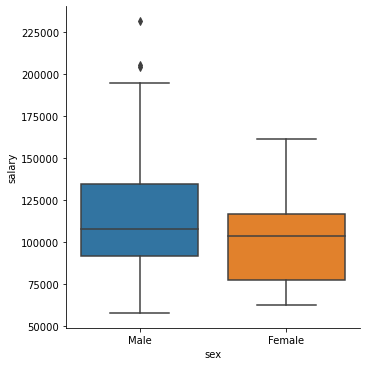

In [27]:
sns.catplot(x='sex', y = 'salary', data=sal, kind = 'box')

- Male salary range: 58000 to 230000, median - 110000 (few outliers)
- Female salary range: 60000 to 170000, median - 105000 (No outliers)

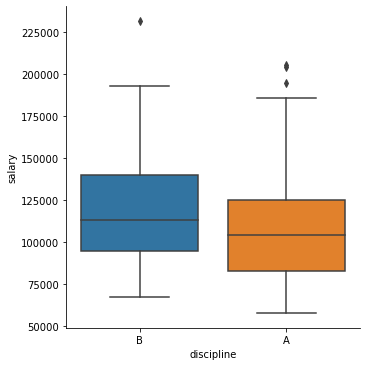

In [29]:
sns.catplot(x='discipline', y = 'salary', data=sal, kind = 'box')

- Discipline A salary range: 58000 to 210000, median - 105000 (few outliers)
- Discipline B salary range: 70000 to 230000, median - 110000 (few outliers)

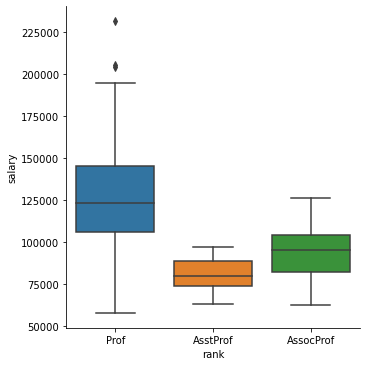

In [30]:
sns.catplot(x='rank', y = 'salary', data=sal, kind = 'box')

- Rank Assistant Professor salary range: 65000 to 90000, median - 77000
- Rank Associate Professor salary range: 65000 to 130000, median - 90000
- Rank Professor salary range: 60000 to 230000, median - 125000 (few outliers)

# Correlation

In [32]:
sal.corr()

yrs.since.phd  yrs.service    salary
yrs.since.phd       1.000000     0.909649  0.419231
yrs.service         0.909649     1.000000  0.334745
salary              0.419231     0.334745  1.000000

In [33]:
sal.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

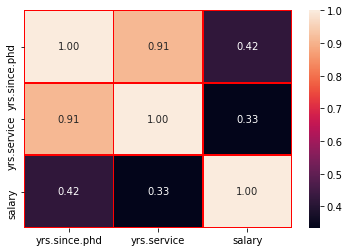

In [35]:
# PlotHeatmap
sns.heatmap(sal.corr(), annot=True, linewidth=0.8,linecolor='red', fmt='.2f')

   - features are strongly correlated

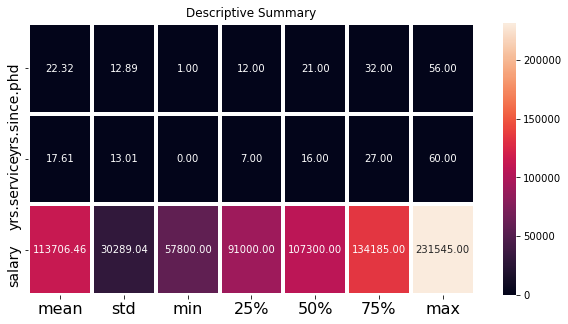

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(round(sal.describe()[1:].transpose(),3),linewidth=3, annot=True,fmt='.2f')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 14)
plt.title("Descriptive Summary")
plt.savefig('Heatmap_desc_salary.png')
plt.show()

In [37]:
#Encoding :categorical data into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

list = ['rank','discipline', 'sex']
for val in list:
    sal[val]=le.fit_transform(sal[val].astype(str))

sal


rank  discipline  yrs.since.phd  yrs.service  sex  salary
0       2           1             19           18    1  139750
1       2           1             20           16    1  173200
2       1           1              4            3    1   79750
3       2           1             45           39    1  115000
4       2           1             40           41    1  141500
..    ...         ...            ...          ...  ...     ...
392     2           0             33           30    1  103106
393     2           0             31           19    1  150564
394     2           0             42           25    1  101738
395     2           0             25           15    1   95329
396     1           0              8            4    1   81035

[397 rows x 6 columns]

In [38]:
#Removing Outliers
from scipy.stats import zscore
z_sal = np.abs(zscore(sal))
z_sal

array([[0.64925739, 0.91540317, 0.25754973, 0.02966908, 0.3300584 ,
        0.86091884],
       [0.64925739, 0.91540317, 0.17985426, 0.12429986, 0.3300584 ,
        1.96667226],
       [0.67256406, 0.91540317, 1.42298184, 1.12509795, 0.3300584 ,
        1.12249537],
       ...,
       [0.64925739, 1.09241483, 1.52944617, 0.56856036, 0.3300584 ,
        0.39564018],
       [0.64925739, 1.09241483, 0.20862311, 0.20128433, 0.3300584 ,
        0.60750187],
       [0.67256406, 1.09241483, 1.11219995, 1.04811348, 0.3300584 ,
        1.08001725]])

In [39]:
np.where(z_sal>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [41]:
sal_new = sal[(z_sal<3).all(axis=1)]
sal_new

rank  discipline  yrs.since.phd  yrs.service  sex  salary
0       2           1             19           18    1  139750
1       2           1             20           16    1  173200
2       1           1              4            3    1   79750
3       2           1             45           39    1  115000
4       2           1             40           41    1  141500
..    ...         ...            ...          ...  ...     ...
392     2           0             33           30    1  103106
393     2           0             31           19    1  150564
394     2           0             42           25    1  101738
395     2           0             25           15    1   95329
396     1           0              8            4    1   81035

[354 rows x 6 columns]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_r = LinearRegression()
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [44]:
x = sal_new.iloc[:,:-1]
x.sample()

rank  discipline  yrs.since.phd  yrs.service  sex
21     2           0             36           31    1

In [45]:
# Target column
y = sal_new.iloc[:,-1]
y.head(3)

0    139750
1    173200
2     79750
Name: salary, dtype: int64

In [46]:
for i in range(0,1000):
    x_train, x_test,y_train, y_test = train_test_split(x,y, random_state=i, test_size=0.20)
    lin_r.fit(x_train, y_train)
    print("At random state", i, "the model performs very well")
    print("At random state",i)
    print("Training score is\n ",lin_r.score(x_train, y_train))
    pred_test= lin_r.predict(x_test)
    print(f"Predicted value is {pred_test} and Actual value is {y_test.tolist()}\n")
    print('Mean absolute error:- ',mean_absolute_error(y_test, pred_test))
    print('Mean squared error:- ',mean_squared_error(y_test, pred_test))
    print('Root mean squared error:- ',np.sqrt(mean_squared_error(y_test, pred_test)))
    print('r2 Score:- ', r2_score(y_test, pred_test))
    print('*'*80,'\n')

At random state 0 the model performs very well
At random state 0
Training score is
  0.34580725676637425
Predicted value is [132041.59112128  99641.53959231 146146.57608941 128375.91742878
  81680.61206328 112334.10637323 109709.61807353 133150.29514037
 140715.0861175  130806.55767208 122231.30013476 121683.92889785
 119421.67160115 119197.10471215 119775.19478165 117288.37059594
  85079.66535029 120965.54785296 131774.97071578 113077.95252794
 115183.16156194 113498.99433474  88349.76234579 122425.14819116
 116867.32878914 116572.61641244 124729.45900436  88995.3710416
 121459.36200885 117569.12142735 120235.66324355 125571.54261796
 100385.38574701  87086.63692539 100806.42755382 124659.31351666
  88995.3710416   75014.08864217 124954.02589336 121976.01441316
 117091.89567814 115309.49099204 108221.92576412 129933.75522588
 118747.97093414 127873.22656976 111393.78530073 103880.04963152
 129781.96068597 118834.87370915 113498.99433474  86342.79077069
  79056.12376358  87568.99130909

In [47]:
for i in range(0,1000):
    x_train, x_test,y_train, y_test = train_test_split(x,y, random_state=60, test_size=0.20)
    lin_r.fit(x_train, y_train)
    print("At random state", i, "the model performs very well")
    print("At random state",i)
    print("Training score is\n ",lin_r.score(x_train, y_train))
    pred_test= lin_r.predict(x_test)
    print(f"Predicted value is {pred_test} and Actual value is {y_test.tolist()}\n")
    print('Mean absolute error:- ',mean_absolute_error(y_test, pred_test))
    print('Mean squared error:- ',mean_squared_error(y_test, pred_test))
    print('Root mean squared error:- ',np.sqrt(mean_squared_error(y_test, pred_test)))
    print('r2 Score:- ', r2_score(y_test, pred_test))
    print('*'*80,'\n')

At random state 0 the model performs very well
At random state 0
Training score is
  0.3714197671015448
Predicted value is [101422.57193792 127747.88386283 125458.90399823 120658.44601114
 121912.06033928 101247.64010547 124427.78792798 130456.38149199
 126913.78729924 113462.82564229 106086.32524242 115185.28094629
 119060.80538029 123702.47101058 121413.49114598 109088.73201498
 119003.94607444  94464.79535461 135272.18500674 118562.23618699
 142490.68699779 135634.84346544 136065.45729144 114754.66712029
 100318.45708617 126150.24323198 106935.66288498  82241.96927456
 125753.60708963  99457.22943417  94260.13530472 124824.42407033
 120783.26068429 122274.71879798 102108.86775747 114924.55553854
 113032.21181629 125787.58477328  82464.46753246 140575.46165334
 126822.95030974  73856.44047866  81018.08316386 135227.11126164
 100318.45708617 119162.73843124 115219.25862994 131385.56451129
 130490.35917564 119260.42201598 104760.50608077 122308.69648163
 107796.89053698 124461.76561163

In [48]:
x_train.shape

(283, 5)

In [49]:
y_train

161    176500
1      173200
354     83600
93     166024
355    145028
        ...  
83      88825
113    104279
81     135585
76     150480
234     69700
Name: salary, Length: 283, dtype: int64

In [50]:
x_test.shape

(71, 5)

In [51]:
y_test.shape

(71,)

# THANK YOU